In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch
from IPython.display import display, HTML
#import plotly.express as px
import os
from scipy.integrate import cumtrapz

### to plot original AGWP (calculcated Module_B) vs. CRF intergated by : 
1. IPCC RF 
2. Annie's instantaneously DCF 

In [2]:
whichgas = "CH4"
rf_single_sheet_name = "rf_pointvalue" + whichgas + "_2020"
dcf_single_sheet_name = "dcf_pointvalue" + whichgas + "_2020"
agwp_single_sheet_name = "agwp_pointvalue" + whichgas + "_2020"  

abs_fp = "/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/FaIR_dpCFs/output/metrics/" 

for scn in ["ssp119" ]: 
    fname = (str("agwp_dcf_gwp100_tstep1" + whichgas + "_" + scn + "_fair_start2000MY2020.xlsx" ))
    file_path = os.path.join(abs_fp, fname)
    dfagwp = pd.read_excel(file_path, sheet_name = agwp_single_sheet_name )
    dfrf = pd.read_excel(file_path, sheet_name = rf_single_sheet_name )
    dfdcf =  pd.read_excel(file_path, sheet_name = dcf_single_sheet_name )
    #ipcc_109_agwp_df_list.append(df)

In [3]:
x = dfrf.iloc[:, 0].values
y_rf = dfrf.iloc[:, 1].values
y_dcf = dfdcf.iloc[:, 1].values
cumulative_integral_RF = cumtrapz(y_rf, x, initial=0)
cumulative_integral_DCF = cumtrapz(y_dcf, x, initial=0)

CRFbyrf_dcf_agwp = pd.DataFrame(zip(dfagwp.iloc[:, 1].values , 
                cumulative_integral_RF, 
                cumulative_integral_DCF), 
              columns = ["orig_AGWP", "rf_intg", "dcf_intg"])


In [4]:
CRFbyrf_dcf_agwp

,orig_AGWP,rf_intg,dcf_intg
0,0.000000e+00,0.000000e+00,0.000000e+00
1,2.119465e-13,2.124054e-13,1.059733e-13
2,4.055518e-13,4.063086e-13,3.086879e-13
3,5.822652e-13,5.834545e-13,4.938016e-13
4,7.438037e-13,7.453664e-13,6.629169e-13
...,...,...,...
96,2.367745e-12,2.370263e-12,2.370265e-12
97,2.366261e-12,2.368759e-12,2.368778e-12
98,2.364770e-12,2.367249e-12,2.367284e-12
99,2.363273e-12,2.365733e-12,2.365783e-12


<Figure size 1000x500 with 0 Axes>

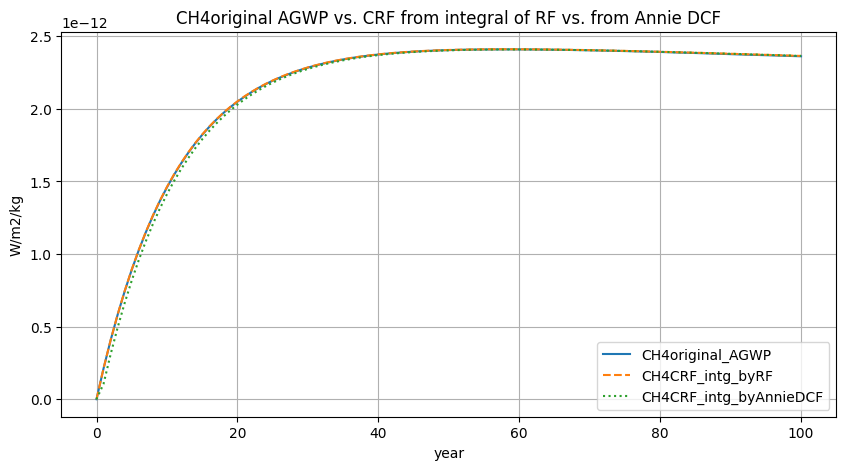

In [5]:
plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.plot(x, CRFbyrf_dcf_agwp.iloc[: ,0], label=whichgas + 'original_AGWP')
plt.plot(x[:], CRFbyrf_dcf_agwp.iloc[: ,1], label=whichgas + 'CRF_intg_byRF', linestyle='--')
plt.plot(x[:], CRFbyrf_dcf_agwp.iloc[: ,2], label=whichgas + 'CRF_intg_byAnnieDCF', linestyle=':')

plt.xlabel('year')
plt.ylabel('W/m2/kg')
plt.legend()
plt.title( whichgas + 'original AGWP vs. CRF from integral of RF vs. from Annie DCF')
plt.grid(True)
plt.show()

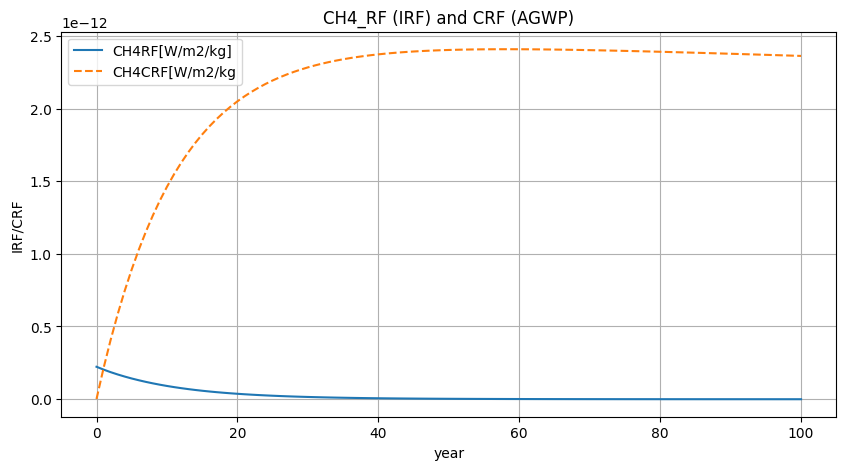

In [6]:

# let's integral RF against t
x = dfrf.iloc[:, 0].values
y = dfrf.iloc[:, 1].values
cumulative_integral_RF = cumtrapz(y, x, initial=0)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label=whichgas + 'RF[W/m2/kg]')
plt.plot(x[:], cumulative_integral_RF, label=whichgas + 'CRF[W/m2/kg', linestyle='--')
plt.xlabel('year')
plt.ylabel('IRF/CRF')
plt.legend()
plt.title( whichgas + '_RF (IRF) and CRF (AGWP)')
plt.grid(True)
plt.show()